In [7]:

import pandas as pd
# csv-file/Textdatei lesen
# Pfad unter Windows z. B. C:\\Users\km\Downloads\Maisproduktion.txt
data =pd.read_csv(r"C:\Users\test\Statistik Labor\Statistik Labor 2\sr_aufg_2_Deine Martikelnummer.txt",  # Datei oder Pfad 
                     sep='\s+',
                     decimal = ',',
                     header = None,
                     names = ['Jahr','Einwohner in Mio.'])

pd.set_option('display.max_rows', None)
data

,Jahr,Einwohner in Mio.
0,1790,3.929214
1,1800,5.308483
2,1810,7.239881
3,1820,9.638453
4,1830,12.866020
5,1840,17.069453
6,1850,23.191876
7,1860,31.443321
8,1870,39.818449
9,1880,50.189209


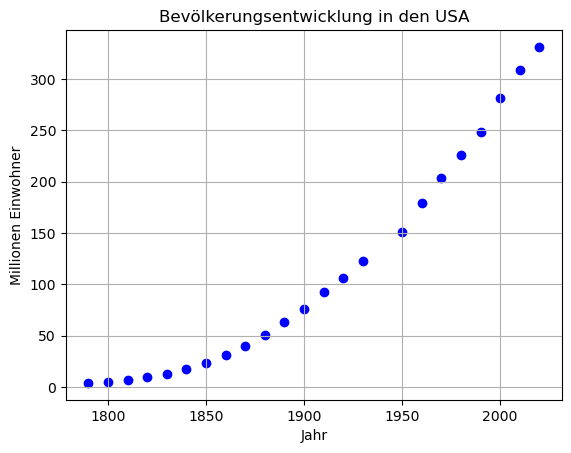

In [8]:
import matplotlib.pyplot as plt

#Erstellung von Steuerdiagrammen. Zeigt die Beziehung zweier Variablen
plt.scatter(data['Jahr'], data['Einwohner in Mio.'], color='blue') # oder df.plot(kind='scatter', x='Jahr', y='Einwohner in Mio.')


plt.title('Bevölkerungsentwicklung in den USA') # setzt den Titel des Diagramms
plt.xlabel('Jahr') #Beschriftet die x-Achse
plt.ylabel('Millionen Einwohner') # Beschriftet die y-Achse 

plt.grid(True)
plt.show()

In [9]:
import numpy as np
import math
from numpy import log
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn.preprocessing import StandardScaler
X = data['Jahr'].to_numpy().reshape(-1, 1)
x_scaled = StandardScaler().fit_transform(X)
linear_regressor = LinearRegression()
linear_regressor.fit(X, data['Einwohner in Mio.'])
r2 = linear_regressor.score(X, data['Einwohner in Mio.'])

# Degree 2
deg_2 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_scaled)
poly_regressor_2 = LinearRegression()
poly_regressor_2.fit(deg_2, data['Einwohner in Mio.'])
r2_2 = poly_regressor_2.score(deg_2, data['Einwohner in Mio.'])


# Degree 3
deg_3 = PolynomialFeatures(degree=3, include_bias=False).fit_transform(x_scaled)
poly_regressor_3 = LinearRegression()
poly_regressor_3.fit(deg_3, data['Einwohner in Mio.'])
r2_3 = poly_regressor_3.score(deg_3, data['Einwohner in Mio.'])

# Degree 4
deg_4 = PolynomialFeatures(degree=4, include_bias=False).fit_transform(x_scaled)
poly_regressor_4 = LinearRegression()
poly_regressor_4.fit(deg_4, data['Einwohner in Mio.'])
r2_4 = poly_regressor_4.score(deg_4, data['Einwohner in Mio.'])

# Degree 5
deg_5 = PolynomialFeatures(degree=5, include_bias=False).fit_transform(x_scaled)
poly_regressor_5 = LinearRegression()
poly_regressor_5.fit(deg_5, data['Einwohner in Mio.'])
r2_5 = poly_regressor_5.score(deg_5, data['Einwohner in Mio.'])

# Degree 6
deg_6 = PolynomialFeatures(degree=6, include_bias=False).fit_transform(x_scaled)
poly_regressor_6 = LinearRegression()
poly_regressor_6.fit(deg_6, data['Einwohner in Mio.'])
r2_6 = poly_regressor_6.score(deg_6, data['Einwohner in Mio.'])

# logarithm
def logarithm(x, a, b):
    return a * np.log(x) - b
val = data['Jahr']-np.mean(data['Jahr'])/np.std(data['Jahr'])
coef_log, cov_log = curve_fit(logarithm, val, data['Einwohner in Mio.'])
r2_log = logarithm(val, *coef_log)

res = data['Einwohner in Mio.'] - r2_log
squared_sum_log = np.sum(res**2)
squared_sum_total_log = np.sum((data['Einwohner in Mio.']-np.mean(data['Einwohner in Mio.']))**2)
R_squared_log = 1 - squared_sum_log/squared_sum_total_log

In [10]:
linear = {
    0: '$a_1$ = %.2f, $a_0$ = %.2f' % (linear_regressor.coef_[0], linear_regressor.intercept_),
    1: r2
}
poly_2 = {
    0: '$a_2$ = %.2f, $a_1$ = %.2f, $a_0$ = %.2f' % (poly_regressor_2.coef_[1], 
                                                    poly_regressor_2.coef_[0], 
                                                    poly_regressor_2.intercept_),
    1: r2_2
}
poly_3 = {
    0: '$a_3$ = %.2f, $a_2$ = %.2f, $a_1$ = %.2f, $a_0$ = %.2f' % (poly_regressor_3.coef_[2],
                                                                    poly_regressor_3.coef_[1],
                                                                    poly_regressor_3.coef_[0],
                                                                    poly_regressor_3.intercept_),
    1: r2_3
}
poly_4 = {
    0: '$a_4$ = %.2f, $a_3$ = %.2f, $a_2$ = %.2f, $a_1$ = %.2f, $a_0$ = %.2f' % (poly_regressor_4.coef_[3],
                                                                                    poly_regressor_4.coef_[2],
                                                                                    poly_regressor_4.coef_[1],
                                                                                    poly_regressor_4.coef_[0],
                                                                                    poly_regressor_4.intercept_),
    1: r2_4
}
poly_5 = {
    0: '$a_5$ = %.2f, $a_4$ = %.2f, $a_3$ = %.2f, $a_2$ = %.2f, $a_1$ = %.2f, $a_0$ = %.2f' 
    % (poly_regressor_5.coef_[4],
         poly_regressor_5.coef_[3],
            poly_regressor_5.coef_[2],
            poly_regressor_5.coef_[1],
            poly_regressor_5.coef_[0],
            poly_regressor_5.intercept_),
    1: r2_5
}

poly_6 = {
    0: '$a_6$ = %.2f, $a_5$ = %.2f, $a_4$ = %.2f, $a_3$ = %.2f, $a_2$ = %.2f, $a_1$ = %.2f, $a_0$ = %.2f'
    % (poly_regressor_6.coef_[5],
            poly_regressor_6.coef_[4],
            poly_regressor_6.coef_[3],
            poly_regressor_6.coef_[2],
            poly_regressor_6.coef_[1],
            poly_regressor_6.coef_[0],
            poly_regressor_6.intercept_),
    1: r2_6
}

ln = {
    0: '$a$ = %.2f, $b$ = %.2f' % (coef_log[0], coef_log[1]),
    1: R_squared_log
}

dat = [
    linear.values(),
    poly_2.values(),
    poly_3.values(),
    poly_4.values(),
    poly_5.values(),
    poly_6.values(),
    ln.values()
]
dataf = pd.DataFrame(dat,
        columns=['Koefizienten', 'Bestimmtheitsmaß'],
        index=['Linear', 'Polynom 2', 'Polynom 3', 
                'Polynom 4', 'Polynom 5', 'Polynom 6', 
                 'Logarithmusfunktion'])
dataf

,Koefizienten,Bestimmtheitsmaß
Linear,"$a_1$ = 1.43, $a_0$ = -2617.43",0.925480
Polynom 2,"$a_2$ = 32.80, $a_1$ = 98.90, $a_0$ = 79.91",0.999475
Polynom 3,"$a_3$ = 0.74, $a_2$ = 32.77, $a_1$ = 97.60, $a...",0.999503
Polynom 4,"$a_4$ = -0.03, $a_3$ = 0.74, $a_2$ = 32.86, $a...",0.999503
Polynom 5,"$a_5$ = -0.80, $a_4$ = 0.04, $a_3$ = 3.33, $a_...",0.999519
Polynom 6,"$a_6$ = -3.21, $a_5$ = -0.45, $a_4$ = 12.53, $...",0.999704
Logarithmusfunktion,"$a$ = 2678.98, $b$ = 20077.17",0.916721


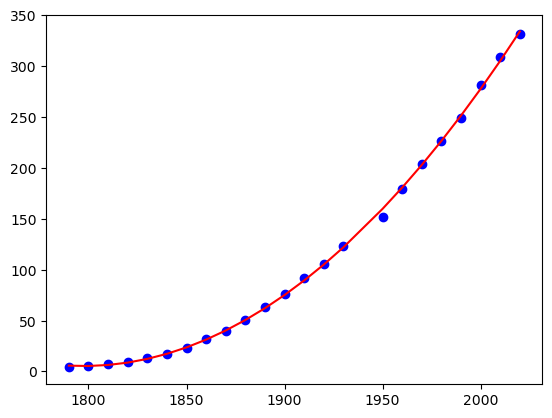

In [11]:
deg_2_pred = poly_regressor_2.predict(deg_2)# Hier werden die vorhergesagten Werte für die quadratische Regression berechnet
plt.scatter(data['Jahr'], data['Einwohner in Mio.'], color='blue')# Ein Streudiagramm der tatsächlichen Daten wird geplottet
plt.plot(X, deg_2_pred, color='red')# Die vorhergesagten Werte der quadratischen Regression werden als rote Linie geplottet
plt.show()


In [12]:
 # Standardisierung der Daten
 scaler = StandardScaler()
 x_scaled = scaler.fit_transform(X.reshape(-1, 1))
 # Prognose für das Jahr 2030
 year_2030 = np.array([[2030]])
 year_2030_scaled = scaler.transform(year_2030.reshape(-1, 1))
 year_2030_poly2 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(year_2030_scaled)
 population_2030 = poly_regressor_2.predict(year_2030_poly2)
 # Ergebinss
 print(f"Beste Prognose für das Jahr 2030: {population_2030[0]:.3f} Millionen Einwohner")

Beste Prognose für das Jahr 2030: 364.042 Millionen Einwohner
